In [58]:
cd TileEM/

[Errno 2] No such file or directory: 'TileEM/'
/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/exactOutput


In [59]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


In [60]:
tileIndMat_DIR = "tileIndMat"

In [61]:
cd exactOutput/

[Errno 2] No such file or directory: 'exactOutput/'
/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/exactOutput


```
python -i  runRandTileTraining.py
```

if pick 10k tiles combo then takes around 3.5 hrs 

3000 tiles combo takes about 2 hrs


In [97]:
df = pd.read_csv("area_based_tile_combo_metric.csv",index_col=0)

In [63]:
df.head()

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
9000,4,[1594 1022 1110 1081 1518 1717 429 2059 1680 ...,646,34.000000,18.912582,0.995399,258.623306,13.611753,0.936267,0.074370
9001,4,[ 429 1090 1680 923 1285 1612 1690 2059 111 ...,699,31.772727,18.989842,0.863175,2698.257527,122.648069,0.984413,0.829820
9002,4,[ 755 819 429 1594 1729 940 1175 1717],269,33.625000,7.975906,0.996988,77.407000,9.675875,0.998909,0.024392
9003,4,[1785 1729 2059 1638 1717 2346 830 731 923 ...,720,34.285714,19.027077,0.906051,2580.011539,122.857692,0.987885,0.783143
9004,4,[1680 940 1690 847 1022 111 1081 755 1529 ...,856,34.240000,24.831216,0.993249,489.936772,19.597471,0.946307,0.133567


### Compare subset results with individual worker PR 

In [64]:
mega_wlst=[]
mega_plst=[]
mega_rlst=[]
mega_objid=[]
for objid in tqdm(object_lst):
    wlst,plst,rlst = compute_worker_PR_obj(objid,return_worker_id=True)
    mega_objid.extend(objid*np.ones_like(wlst))
    mega_wlst.extend(wlst)
    mega_plst.extend(plst)
    mega_rlst.extend(rlst)

In [65]:
workerPR = pd.DataFrame(zip(mega_objid,mega_wlst,mega_plst,mega_rlst),columns=["objid","worker_id","Precision","Recall"])

In [70]:
for obj in list(set(workerPR.objid)):
    wR = workerPR[workerPR["objid"]==objid].sort(columns=["Recall"])["Recall"]
    rR =  df[df["objid"]==objid].sort(columns=["Recall"])["Recall"]
    list3 = [item1 for w,r in zip(wR,rR) if r>w]

In [98]:
Ppercentage=[]
Rpercentage=[]
for objid in list(set(workerPR.objid)):
    wR = workerPR[workerPR["objid"]==objid].sort(columns=["Recall"])["Recall"]
    rR =  df[df["objid"]==objid].sort(columns=["Recall"])["Recall"]
    Rcount= len([r for r in rR if r>max(wR)])
    Rpercentage.append(Rcount/float(len(rR))*100)
    wP = workerPR[workerPR["objid"]==objid].sort(columns=["Precision"])["Precision"]
    rP =  df[df["objid"]==objid].sort(columns=["Precision"])["Precision"]
    Pcount= len([r for r in rP if r>max(wP)])
    Ppercentage.append(Pcount/float(len(rP))*100)

In [102]:
print mean(Ppercentage)
print mean(Rpercentage)

14.2957446809
2.54822695035


In [19]:
workerPR[workerPR["objid"]==5].sort(columns=["Recall","Precision"],ascending=False).head()

,objid,worker_id,Precision,Recall
178,5,238,0.937722,0.950324
155,5,146,0.937226,0.939745
179,5,240,0.944078,0.933686
170,5,199,0.858543,0.927441
151,5,133,0.893055,0.924260


In [20]:
df.sort(columns=["Recall","Precision"],ascending=False).head()

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
14578,5,[1574 1823 954 3198 1702 2890 3103 1626 1604 ...,1282,35.611111,34.209592,0.950266,5504.311643,152.897546,0.996564,1
12412,5,[ 954 2711 1781 3048 2880 1394 2992 2961 1877 ...,1333,36.027027,35.205228,0.951493,5511.561788,148.961129,0.996484,1
13090,5,[1794 3179 2824 2992 2961 1432 1867 3198 2890 ...,1138,35.562500,30.298149,0.946817,5219.164445,163.098889,0.996474,1
12081,5,[2946 2824 2394 1794 1557 1823 2711 2890 2992 ...,925,35.576923,24.281738,0.933913,5262.286656,202.395641,0.996450,1
13385,5,[3182 2711 2487 1001 2573 1823 1394 2992 3242 ...,1210,35.588235,32.223851,0.947760,5457.648058,160.519061,0.996445,1


In [25]:
workerPR[workerPR["objid"]==12].sort(columns=["Recall","Precision"],ascending=False).head()

,objid,worker_id,Precision,Recall
456,12,2,1.000000,1.000000
420,12,6,0.754620,0.997418
429,12,133,0.834533,0.989076
453,12,233,0.866979,0.981572
425,12,54,0.926036,0.981140


In [24]:
df[df["objid"]==12].sort(columns=["Recall","Precision"],ascending=False).head()

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
35332,12,[1471 2258 1375 3287 2932 2729 3000 3237 1341 ...,881,38.304348,21.334367,0.927581,4305.369444,187.189976,0.994579,1
33163,12,[2777 2809 3287 3052 2942 1212 1016 2840 2877 ...,1202,37.562500,28.495182,0.890474,6494.298063,202.946814,0.990707,1
34093,12,[3000 3237 3248 2942 3257 3106 2840 174 543 ...,1095,36.500000,25.524699,0.850823,6441.237484,214.707916,0.989595,1
35795,12,[1375 2901 3287 2932 2809 3185 2942 3257 1187 ...,1015,37.592593,23.529049,0.871446,6391.852677,236.735284,0.989493,1
34491,12,[1187 3000 2942 2729 2901 184 3185 1212 1876 ...,737,36.850000,17.355011,0.867751,4276.053831,213.802692,0.989081,1


# Correlation between variables

In [103]:
df = df[df["Total gamma value"]!=0]

In [109]:
df["N tiles"] = df["T prime"].apply(lambda x:len(x))

In [111]:
correlation = df[df.keys()[2:]].corr('pearson')
correlation

,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall,N tiles
Total Votes,1.000000,0.426193,0.963732,0.351337,0.310127,-0.077207,0.348124,0.669951,0.858427
Average Votes,0.426193,1.000000,0.362036,0.839706,-0.199961,-0.158097,0.727392,0.175690,0.008262
Total gamma value,0.963732,0.362036,1.000000,0.406047,0.352117,-0.060150,0.299424,0.638558,0.864337
Average gamma value,0.351337,0.839706,0.406047,1.000000,-0.151242,-0.191198,0.596024,0.044705,0.009318
Total area,0.310127,-0.199961,0.352117,-0.151242,1.000000,0.618890,-0.344709,0.493618,0.514684
Average area,-0.077207,-0.158097,-0.060150,-0.191198,0.618890,1.000000,-0.257574,0.198278,0.003940
Precision,0.348124,0.727392,0.299424,0.596024,-0.344709,-0.257574,1.000000,0.233437,0.024037
Recall,0.669951,0.175690,0.638558,0.044705,0.493618,0.198278,0.233437,1.000000,0.690449
N tiles,0.858427,0.008262,0.864337,0.009318,0.514684,0.003940,0.024037,0.690449,1.000000


<matplotlib.colorbar.Colorbar instance at 0x1114bb5f0>

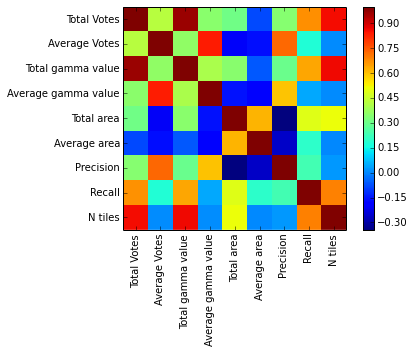

In [113]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,9)
plt.xticks(ticks, df.keys()[2:], rotation='vertical')
plt.yticks(ticks, df.keys()[2:], rotation='horizontal')
plt.colorbar()

- the obvious things are that:
    - average and sum are correlated
    - identity along diagonal is correlated
- surprisingly, area is only weakly correlated with recall
- Total votes and total gamma values are strongly correlated as we expected
- Both total votes and total gamma values are strongly correlated with recall value

# Regression for ground truth PR

In [130]:
x_attr = ["Average Votes","Average gamma value","Total area", "Average area"]
# x_attr=df.keys()[2:-2]
print x_attr
y_attr = ["Precision","Recall"]
print y_attr

['Average Votes', 'Average gamma value', 'Total area', 'Average area']
['Precision', 'Recall']


In [131]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [132]:
msk = np.random.rand(len(df)) < 0.8
Xtrain = df[x_attr][msk].as_matrix()
Xtest = df[x_attr][~msk].as_matrix()
Ytrain = df[y_attr][msk].as_matrix()
Ytest = df[y_attr][~msk].as_matrix()

In [133]:
regr.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(Xtest) - Ytest) ** 2))
print('R^2: %.2f' % regr.score(Xtest, Ytest))

('Coefficients: \n', array([[  2.91349296e-02,  -7.04519282e-02,  -1.49659057e-05,
         -5.05701593e-05],
       [  2.34864116e-02,  -6.00168372e-01,   5.14915300e-05,
         -2.53399345e-04]]))
Mean squared error: 0.05
R^2: 0.50


In [135]:
X = df[x_attr].as_matrix()
Y = df[y_attr].as_matrix()

In [136]:
regr.fit(X,Y)
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[  2.92124419e-02,  -7.27240215e-02,  -1.50302491e-05,
         -5.21223351e-05],
       [  2.36247180e-02,  -6.01186114e-01,   5.15018760e-05,
         -2.52946211e-04]]))


In [137]:
print np.mean(df["Precision"])
print np.mean(df["Recall"])

0.718606001452
0.514224726145


#### $\therefore$ Average gamma value more important in determining actual PR compared to average area or average votes of the selected tiles , results qualitatively agree with our lossy BB2Tile algorithm

### Regression on Precision and Recall Separately


In [153]:
x_attr = ["Average Votes","Average gamma value","Total area", "Average area"]
y_attr = ["Precision"]
regr = linear_model.LinearRegression()
msk = np.random.rand(len(df)) < 0.8
Xtrain = df[x_attr][msk].as_matrix()
Xtest = df[x_attr][~msk].as_matrix()
Ytrain = df[y_attr][msk].as_matrix()
Ytest = df[y_attr][~msk].as_matrix()
regr.fit(Xtrain,Ytrain)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(Xtest) - Ytest) ** 2))
print('R^2: %.2f' % regr.score(Xtest, Ytest))


('Coefficients: \n', array([[  2.92260624e-02,  -7.27511525e-02,  -1.49903129e-05,
         -5.01033788e-05]]))
Mean squared error: 0.05
R^2: 0.58


In [154]:
x_attr = ["Average Votes","Average gamma value","Total area", "Average area"]
y_attr = ["Recall"]
regr = linear_model.LinearRegression()
msk = np.random.rand(len(df)) < 0.8
Xtrain = df[x_attr][msk].as_matrix()
Xtest = df[x_attr][~msk].as_matrix()
Ytrain = df[y_attr][msk].as_matrix()
Ytest = df[y_attr][~msk].as_matrix()
regr.fit(Xtrain,Ytrain)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(Xtest) - Ytest) ** 2))
print('R^2: %.2f' % regr.score(Xtest, Ytest))


('Coefficients: \n', array([[  2.37232548e-02,  -6.00140054e-01,   5.18550392e-05,
         -2.57187967e-04]]))
Mean squared error: 0.06
R^2: 0.38


### Plot Gamma Tiles 

In [5]:
objid=4

In [6]:
tiles = pkl.load(open("../{0}/tiles{1}.pkl".format(tileIndMat_DIR,objid),'r'))
gammas = pkl.load(open("gfile{}.pkl".format(objid),'r'))
# plot_tile_heatmap(10,[],INCLUDE_ALL=True,PLOT_GSOLN=)

In [28]:
def plot_all_obj_tiles(objid,experiment_idx,threshold=0.01,PLOT_BBG=True,PLOT_GSOLN=True):
    '''
    Plot Tile Heatmap for all objects for a given experiment index
    Experiment index 
    0 = Avrg 
    1 = Median
    2 = Local Search
    3 = Exhaustive Search
    '''

    try:
        tiles = pkl.load(open("../{0}/tiles{1}.pkl".format(tileIndMat_DIR,objid),'r'))
        gammas = pkl.load(open("gfile{}.pkl".format(objid),'r'))#ga,gm,gl,ge
        print gammas[experiment_idx]
        # Deriving new solution set from different thresholding criteria
#         solnset =  getSolutionThreshold(gammas[experiment_idx],threshold=threshold)
#         print solnset
        top20largest_tiles = np.argsort([t.area for t in tiles])[::-1][:20]
        top20gamma_tiles = np.argsort(gammas[experiment_idx])[::-1][:20]
        mask = plot_tile_heatmap(objid, top20gamma_tiles,tiles,gammas[experiment_idx],PLOT_BBG=PLOT_BBG,PLOT_GSOLN=PLOT_GSOLN)
    except(IOError):
        pass

In [8]:
count = 0
for objid in object_lst:
    gammas = pkl.load(open("gfile{}.pkl".format(objid),'r'))
    if gammas!=[]:
        count+=1

In [9]:
count

16

In [10]:
type(tile)

function

[  4.31945175e-01   4.15634414e-05  -3.05842317e-06 ...,   9.99995224e-01
  -1.40774056e-06   9.99998522e-01]


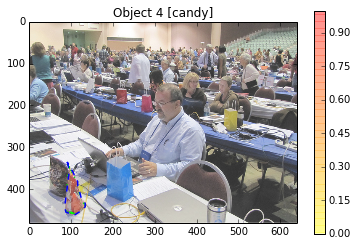

In [29]:
plot_all_obj_tiles(4,2)

[  4.31945175e-01   4.15634414e-05  -3.05842317e-06 ...,   9.99995224e-01
  -1.40774056e-06   9.99998522e-01]


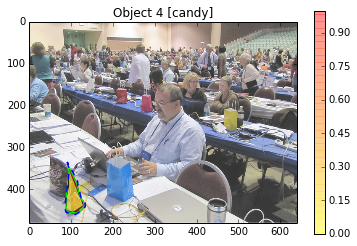

In [20]:
plot_all_obj_tiles(4,2)

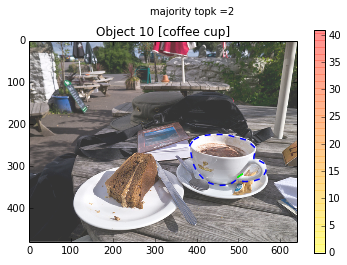

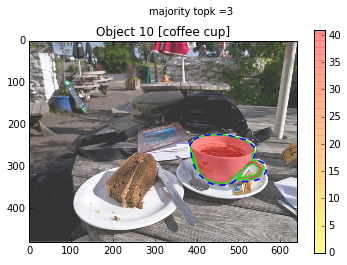

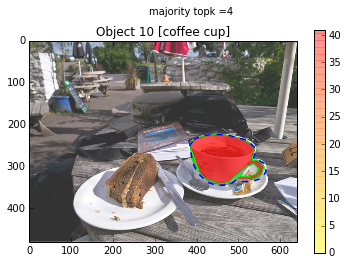

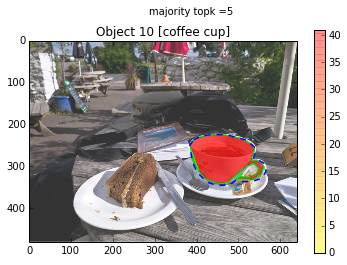

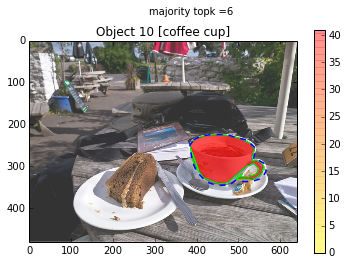

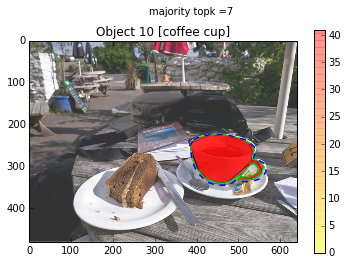

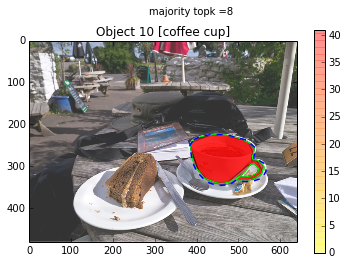

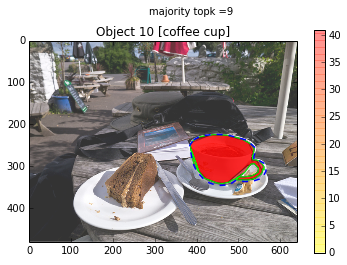

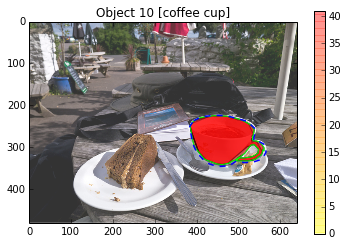

In [45]:
objid=10
tiles = pkl.load(open("../{0}/tiles{1}.pkl".format(tileIndMat_DIR,objid),'r'))
objIndicatorMat = pkl.load(open("../{0}/indMat{1}.pkl".format(tileIndMat_DIR,objid),'r'))
k_lst = np.arange(1,10)
tile_votes = np.sum(objIndicatorMat[:-1],axis=0)
for majority_topk in k_lst:
    solnset = getSolutionTopK(tile_votes,k=majority_topk)
    plt.suptitle("majority topk ={}".format(majority_topk))
    mask = plot_tile_heatmap(objid,solnset ,tiles,tile_votes,PLOT_BBG=True,PLOT_GSOLN=True,INCLUDE_ALL=False)

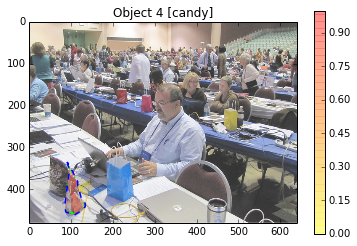

In [54]:
objid=4
tiles = pkl.load(open("../{0}/tiles{1}.pkl".format(tileIndMat_DIR,objid),'r'))
gamma = pkl.load(open("gfile{0}.pkl".format(objid),'r'))[0]
# k_lst = np.arange(1,10)
# tile_votes = np.sum(objIndicatorMat[:-1],axis=0)
# for majority_topk in k_lst:
# solnset = getSolutionTopK(tile_votes,k=majority_topk)
plt.suptitle("majority top-k ={}".format(majority_topk))
top20gamma_tiles = np.argsort(gamma)[::-1][:20]
mask = plot_tile_heatmap(objid,top20gamma_tiles,tiles,gamma,PLOT_BBG=True,PLOT_GSOLN=True,INCLUDE_ALL=False)

# Tile Picking Heuristic

In [165]:
area_df = pd.read_csv("area_based_tile_combo_metric.csv",index_col=0)
area_df = area_df[area_df["Total gamma value"]!=0]
gamma_df = pd.read_csv("area_based_tile_combo_metric_gamma.csv",index_col=0)
majvote_df = pd.read_csv("area_based_tile_combo_metric_majvote.csv",index_col=0)

In [175]:
random_df = pd.read_csv("random_tile_combo_metric.csv",index_col=0)

In [177]:
pd.DataFrame([[area_df["Precision"].mean(),area_df["Recall"].mean()],\
[gamma_df["Precision"].mean(),gamma_df["Recall"].mean()],\
[majvote_df["Precision"].mean(),majvote_df["Recall"].mean()],\
[random_df["Precision"].mean(),random_df["Recall"].mean()]],columns=["Precision","Recall"]).rename(\
        index={0:"Top 40 Area",1:"Top 40 gamma",2:"Top 40 Majority Vote",3:"Random"})

,Precision,Recall
Top 40 Area,0.718606,0.514225
Top 40 gamma,0.489850,0.000276
Top 40 Majority Vote,0.912405,0.516369
Random,0.328364,0.000436
